# Lab work #1
# Yuliia Shevchenko
# CS32

# List of source datasets
1. [Car Price Dataset](https://www.kaggle.com/datasets/asinow/car-price-dataset)
2. [Diabetes Dataset](https://www.kaggle.com/datasets/asinow/diabetes-dataset)
3. [U.S Post College Salaries](https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries)
4. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
5. [Arrest Data in Los Angeles](https://www.kaggle.com/datasets/arsri1/arrest-data-in-los-angeles)
6. [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)
7. [Digital Literacy Education Dataset](https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset)
8. [Global Country Information Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)
9. [College Basketball Dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset)
10. [Pulsar Dataset HTRU2](https://www.kaggle.com/datasets/charitarth/pulsar-dataset-htru2)
11. [Travel Review Rating Dataset](https://www.kaggle.com/datasets/wirachleelakiatiwong/travel-review-rating-dataset)
12. [School Attendance by District 2021-2022](https://www.kaggle.com/datasets/usmanlovescode/school-attendance-b-district-2021-2022)

## Task 1: Data Cleaning and Preparation
**Objective:** Clean and prepare a dataset for analysis.

**Instructions:**
1. Load a dataset of your choice (from proposed Datasets).
2. Handle missing values by either removing them or imputing with appropriate values.
3. Remove any duplicate rows.
4. Convert categorical variables into numerical format using techniques like one-hot encoding (but be aware of sparse and non-sparse one-hot encoding).
5. Normalize or standardize numerical features.
6. Save the cleaned dataset to a new CSV file.

In [25]:
import pandas as pd
df = pd.read_csv("digital_literacy_dataset.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3


In [26]:
print("Кількість пропущених даних\n", df.isnull().sum())
df['Education_Level'] = df['Education_Level'].fillna('Unknown')

Кількість пропущених даних
 User_ID                                           0
Age                                               0
Gender                                            0
Education_Level                                 212
Employment_Status                                 0
Household_Income                                  0
Location_Type                                     0
Basic_Computer_Knowledge_Score                    0
Internet_Usage_Score                              0
Mobile_Literacy_Score                             0
Post_Training_Basic_Computer_Knowledge_Score      0
Post_Training_Internet_Usage_Score                0
Post_Training_Mobile_Literacy_Score               0
Modules_Completed                                 0
Average_Time_Per_Module                           0
Quiz_Performance                                  0
Session_Count                                     0
Engagement_Level                                  0
Adaptability_Score                  

In [27]:
print("Кількість пропущених даних по ствопцях після заповнення\n", df.isnull().sum())
print("Кількість записів до видалення дублікатів: ", len(df))
df = df.drop_duplicates()
print("Кількість записів після видалення дублікатів:", len(df))

Кількість пропущених даних по ствопцях після заповнення
 User_ID                                         0
Age                                             0
Gender                                          0
Education_Level                                 0
Employment_Status                               0
Household_Income                                0
Location_Type                                   0
Basic_Computer_Knowledge_Score                  0
Internet_Usage_Score                            0
Mobile_Literacy_Score                           0
Post_Training_Basic_Computer_Knowledge_Score    0
Post_Training_Internet_Usage_Score              0
Post_Training_Mobile_Literacy_Score             0
Modules_Completed                               0
Average_Time_Per_Module                         0
Quiz_Performance                                0
Session_Count                                   0
Engagement_Level                                0
Adaptability_Score                         

In [28]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,0.157443,Male,Primary,Student,Medium,Semi-Rural,0.002023,-1.584166,0.484977,...,-0.948295,-0.716116,0.976303,-1.325576,Low,0.149588,0.712091,-1.654759,Yes,-0.197408
1,U0002,1.410504,Female,High School,Farmer,Low,Rural,-0.200256,-0.719664,0.618359,...,-0.320701,0.383837,0.641895,0.664280,Low,0.080334,0.712091,1.511277,Yes,-0.479363
2,U0003,0.452281,Female,Primary,Farmer,Low,Semi-Rural,-0.739666,0.410838,-0.782152,...,0.934488,-1.353021,-1.113744,-0.496469,Low,-0.542948,1.422761,-0.038060,Yes,-0.771041
3,U0004,-0.505942,Female,Secondary,Farmer,Low,Rural,-1.279076,0.477338,-0.582079,...,-0.634498,0.960495,-0.946541,1.327566,Medium,-1.096977,-1.419918,-0.981135,Yes,-0.459918
4,U0005,0.673410,Male,High School,Other,Medium,Rural,-0.739666,1.075839,-0.448697,...,-0.634498,-0.578406,-0.361327,-1.657219,Medium,1.049885,0.712091,0.433478,No,-0.090459


In [29]:
df.to_csv('cleaned_dataset.csv', index=False)

## Task 2: Exploratory Data Analysis (EDA)
**Objective:** Perform exploratory data analysis to understand the dataset.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Calculate basic statistics (mean, median, mode, standard deviation) for numerical features.
3. Visualize the distribution of numerical features using histograms and box plots.
4. Create scatter plots to visualize relationships between pairs of numerical features.
5. Use Seaborn to create a pair plot or heatmap to visualize correlations between features.
6. Summarize your findings in a short report.

In [30]:
df = pd.read_csv("cleaned_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   float64
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               1000 non-null   object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   float64
 8   Internet_Usage_Score                          1000 non-null   float64
 9   Mobile_Literacy_Score                         1000 non-null   fl

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,0.157443,Male,Primary,Student,Medium,Semi-Rural,0.002023,-1.584166,0.484977,...,-0.948295,-0.716116,0.976303,-1.325576,Low,0.149588,0.712091,-1.654759,Yes,-0.197408
1,U0002,1.410504,Female,High School,Farmer,Low,Rural,-0.200256,-0.719664,0.618359,...,-0.320701,0.383837,0.641895,0.664280,Low,0.080334,0.712091,1.511277,Yes,-0.479363
2,U0003,0.452281,Female,Primary,Farmer,Low,Semi-Rural,-0.739666,0.410838,-0.782152,...,0.934488,-1.353021,-1.113744,-0.496469,Low,-0.542948,1.422761,-0.038060,Yes,-0.771041
3,U0004,-0.505942,Female,Secondary,Farmer,Low,Rural,-1.279076,0.477338,-0.582079,...,-0.634498,0.960495,-0.946541,1.327566,Medium,-1.096977,-1.419918,-0.981135,Yes,-0.459918
4,U0005,0.673410,Male,High School,Other,Medium,Rural,-0.739666,1.075839,-0.448697,...,-0.634498,-0.578406,-0.361327,-1.657219,Medium,1.049885,0.712091,0.433478,No,-0.090459


In [31]:
print("\nMean\n", df.select_dtypes(include='number').mean())
print("\nMedian\n", df.select_dtypes(include='number').median())
print("\nStandard Deviation\n", df.select_dtypes(include='number').std())


Mean
 Age                                             2.007283e-16
Basic_Computer_Knowledge_Score                  6.394885e-17
Internet_Usage_Score                            7.771561e-17
Mobile_Literacy_Score                          -1.065814e-16
Post_Training_Basic_Computer_Knowledge_Score    9.947598e-17
Post_Training_Internet_Usage_Score             -1.527667e-16
Post_Training_Mobile_Literacy_Score            -1.580958e-16
Modules_Completed                              -6.039613e-17
Average_Time_Per_Module                         1.616485e-16
Quiz_Performance                               -2.229328e-16
Session_Count                                   1.953993e-17
Adaptability_Score                             -2.273737e-16
Feedback_Rating                                -2.202682e-16
Skill_Application                               1.474376e-16
Overall_Literacy_Score                         -2.886580e-16
dtype: float64

Median
 Age                                             0.0100

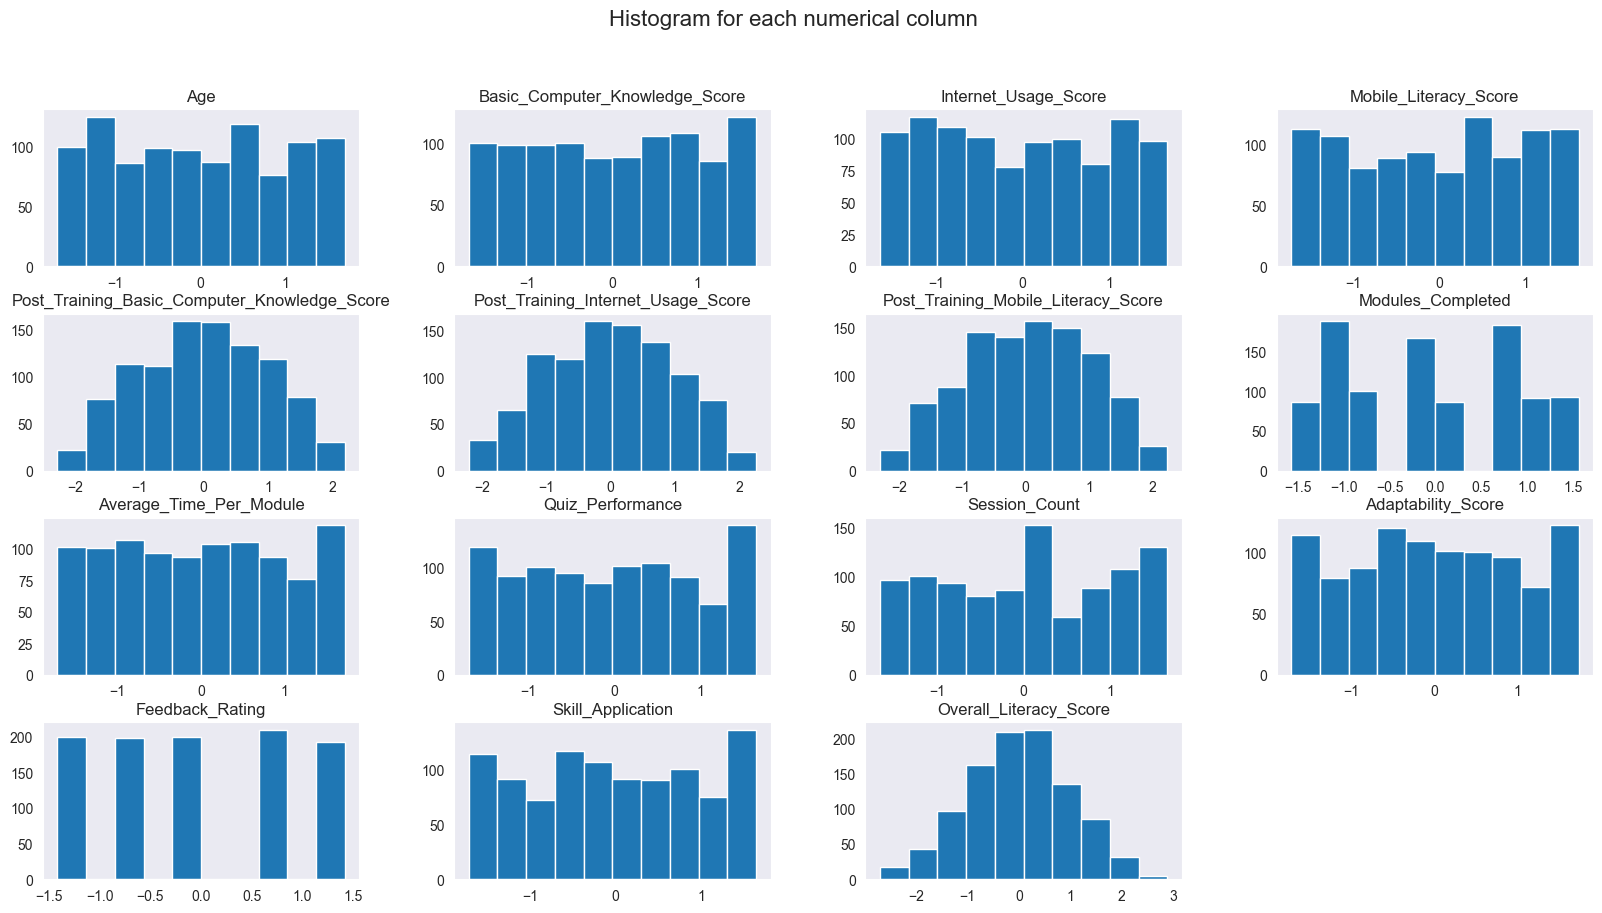

In [32]:
import matplotlib.pyplot as plt
df.select_dtypes(include='number').hist(figsize=(20, 10), grid=False)
plt.suptitle('Histogram for each numerical column', fontsize=16)
plt.show()

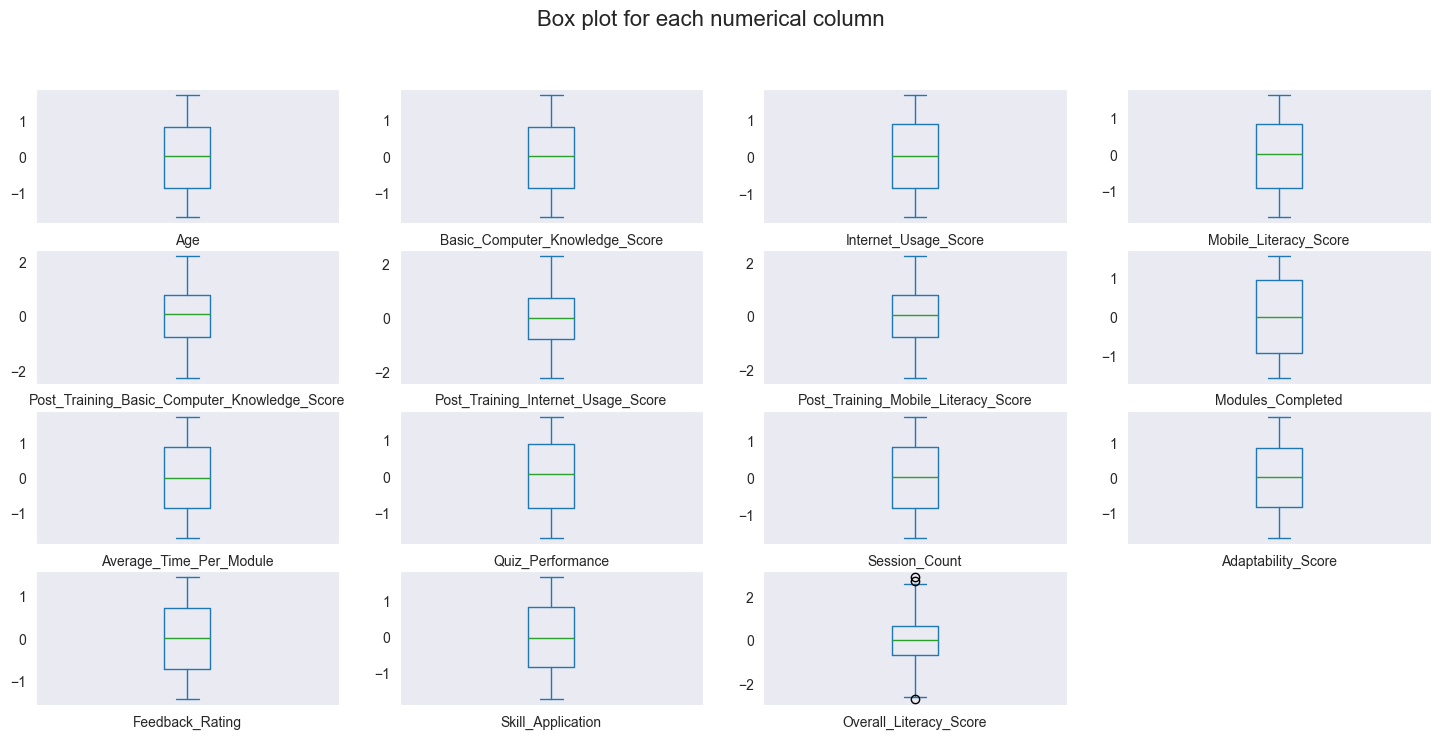

In [33]:
df.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(4, 4), figsize=(18, 8), grid=False)
plt.suptitle('Box plot for each numerical column', fontsize=16)
plt.show()

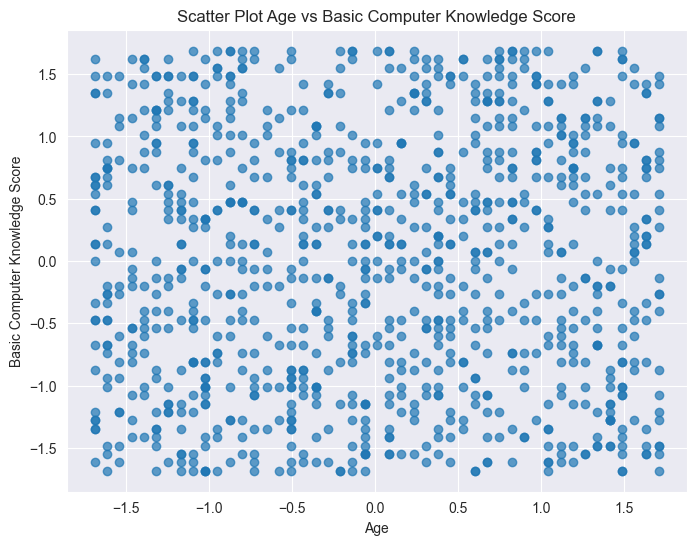

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Basic_Computer_Knowledge_Score'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Basic Computer Knowledge Score')
plt.title('Scatter Plot Age vs Basic Computer Knowledge Score')
plt.grid(True)
plt.show()


Вік не впливає суттєво на результати навчання.

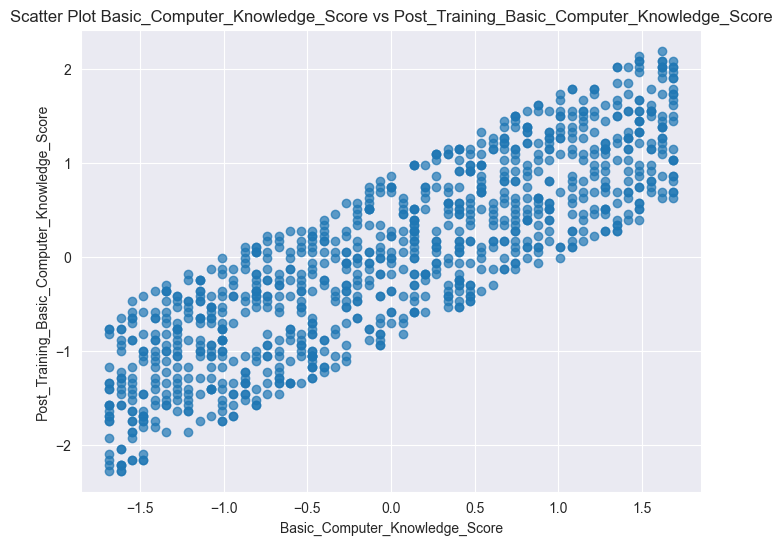

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Basic_Computer_Knowledge_Score'], df['Post_Training_Basic_Computer_Knowledge_Score'], alpha=0.7)
plt.xlabel('Basic_Computer_Knowledge_Score')
plt.ylabel('Post_Training_Basic_Computer_Knowledge_Score')
plt.title('Scatter Plot Basic_Computer_Knowledge_Score vs Post_Training_Basic_Computer_Knowledge_Score')
plt.grid(True)
plt.show()


Сильна позитивну лінійну залежність між базовими знаннями до навчання та після навчання.

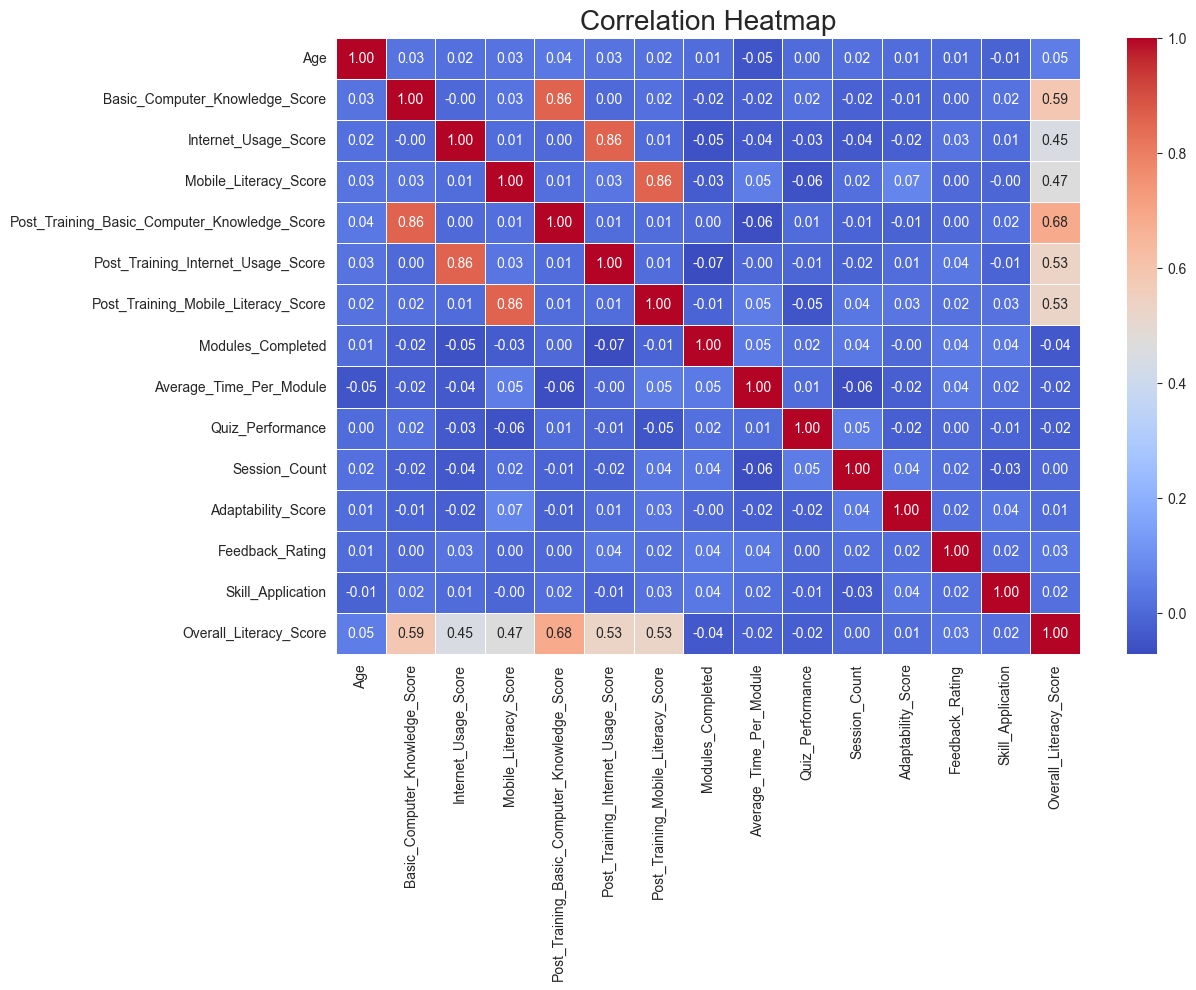

In [36]:
import seaborn as sns

corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

## Висновок
1. Розподіл гістограми показує значне покращення у всіх трьох сферах грамотності (базові знання комп'ютера, використання Інтернету та мобільна грамотність) після навчання, причому показники після навчання мають дзвоноподібний розподіл, зосереджений навколо вищих значень.
2. Feedback_Rating показує загалом позитивні бали з деякими викидами при найвищих значеннях.
3. Коробчасті діаграми підтверджують це покращення, причому медіани після навчання вищі, ніж показники до навчання.
4. Scatter plot показника «Вік» та «Базові знання з інформатики» не показує чіткої закономірності, що підтверджує, що вік не впливає суттєво на результати навчання.
5. Scatter plot показника «Basic_Computer_Knowledge_Score» та «Post_Training_Basic_Computer_Knowledge_Score» показує сильну позитивну лінійну залежність між базовими знаннями комп'ютера до навчання та після навчання. Оскільки після тренінгу людина зазвичай матиме кращі знання.
5. Сильна кореляція (0,86) існує між показниками до та після навчання для кожної сфери грамотності, що свідчить про послідовне покращення серед учасників.
Загальний показник грамотності має сильну позитивну кореляцію з усіма трьома показниками після навчання (0,68, 0,53 та 0,53), що показує, що це хороший складений показник. Вік має мінімальну кореляцію з показниками грамотності (більшість значень близькі до 0), що свідчить про те, що програма добре працює в різних вікових групах.

## Task 3: Feature Engineering
**Objective:** Create new features to improve the dataset's predictive power.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Create new features based on existing ones (e.g., age groups, interaction terms).
3. Use domain knowledge to generate meaningful features.
4. Analyze the impact of the new features on the dataset's distribution and correlations.
5. Visualize the new features using appropriate plots.

In [37]:
def create_age_groups(age_standardized):
    if age_standardized < -1:
        return 'Very Young'
    elif age_standardized < -0.5:
        return 'Young'
    elif age_standardized < 0.5:
        return 'Middle Aged'
    elif age_standardized < 1:
        return 'Senior'
    else:
        return 'Very Senior'

df['Age_Group'] = df['Age'].apply(create_age_groups)

# Розрахунок покращення для кожної навички (різниця до і після)
df['Basic_Computer_Improvement'] = df['Post_Training_Basic_Computer_Knowledge_Score'] - df['Basic_Computer_Knowledge_Score']
df['Internet_Usage_Improvement'] = df['Post_Training_Internet_Usage_Score'] - df['Internet_Usage_Score']
df['Mobile_Literacy_Improvement'] = df['Post_Training_Mobile_Literacy_Score'] - df['Mobile_Literacy_Score']

# Створення загального показника покращення
df['Total_Improvement'] = df['Basic_Computer_Improvement'] + df['Internet_Usage_Improvement'] + df['Mobile_Literacy_Improvement']

# Індекс залученості
df['Engagement_Index'] = (df['Session_Count'] + df['Modules_Completed'] + df['Quiz_Performance']) / 3

# Індикатор складності навчання
df['Learning_Difficulty'] = df['Average_Time_Per_Module'] / (df['Quiz_Performance'] + 1)

# Взаємодія між адаптивністю та базовими знаннями
df['Adaptability_Basic_Interaction'] = df['Adaptability_Score'] * df['Basic_Computer_Knowledge_Score']

# Взаємодія між кількістю сеансів і часом кожного модуля
df['Session_Time_Interaction'] = df['Session_Count'] * df['Average_Time_Per_Module']

# Створення категорії успіху
def success_level(improvement):
    if improvement < -1:
        return 'Negative'
    elif improvement < 0:
        return 'Slight Decrease'
    elif improvement < 0.5:
        return 'Slight Improvement'
    elif improvement < 1:
        return 'Moderate Improvement'
    else:
        return 'Significant Improvement'

df['Success_Category'] = df['Total_Improvement'].apply(success_level)

# Співвідношення навичок
df['Skills_Balance'] = 1 - (abs(df['Basic_Computer_Knowledge_Score'] - df['Internet_Usage_Score']) +
                         abs(df['Internet_Usage_Score'] - df['Mobile_Literacy_Score']) +
                         abs(df['Mobile_Literacy_Score'] - df['Basic_Computer_Knowledge_Score'])) / 3

new_columns = ['Age_Group', 'Basic_Computer_Improvement', 'Internet_Usage_Improvement', 'Mobile_Literacy_Improvement',
                      'Total_Improvement', 'Engagement_Index','Learning_Difficulty','Adaptability_Basic_Interaction', 'Session_Time_Interaction',
                      'Success_Category', 'Skills_Balance']
df[new_columns].head()

,Age_Group,Basic_Computer_Improvement,Internet_Usage_Improvement,Mobile_Literacy_Improvement,Total_Improvement,Engagement_Index,Learning_Difficulty,Adaptability_Basic_Interaction,Session_Time_Interaction,Success_Category,Skills_Balance
0,Middle Aged,-0.358436,1.016752,0.163964,0.822280,-0.432523,-0.362351,0.000303,0.949266,Moderate Improvement,-0.379429
1,Very Senior,-0.272234,-0.471406,0.257722,-0.485918,0.328492,0.233777,-0.016087,0.254975,Slight Decrease,0.107985
2,Middle Aged,-0.081053,-0.864860,0.806456,-0.139457,-0.225242,11.895271,0.401600,0.671733,Slight Decrease,0.204674
3,Young,-0.122026,0.259257,0.776738,0.913969,-0.084491,17.966827,1.403117,1.275120,Moderate Improvement,-0.170943
4,Senior,-0.197130,0.454501,-0.038065,0.219306,-0.884348,-0.905638,-0.776564,0.958546,Slight Improvement,-0.210337


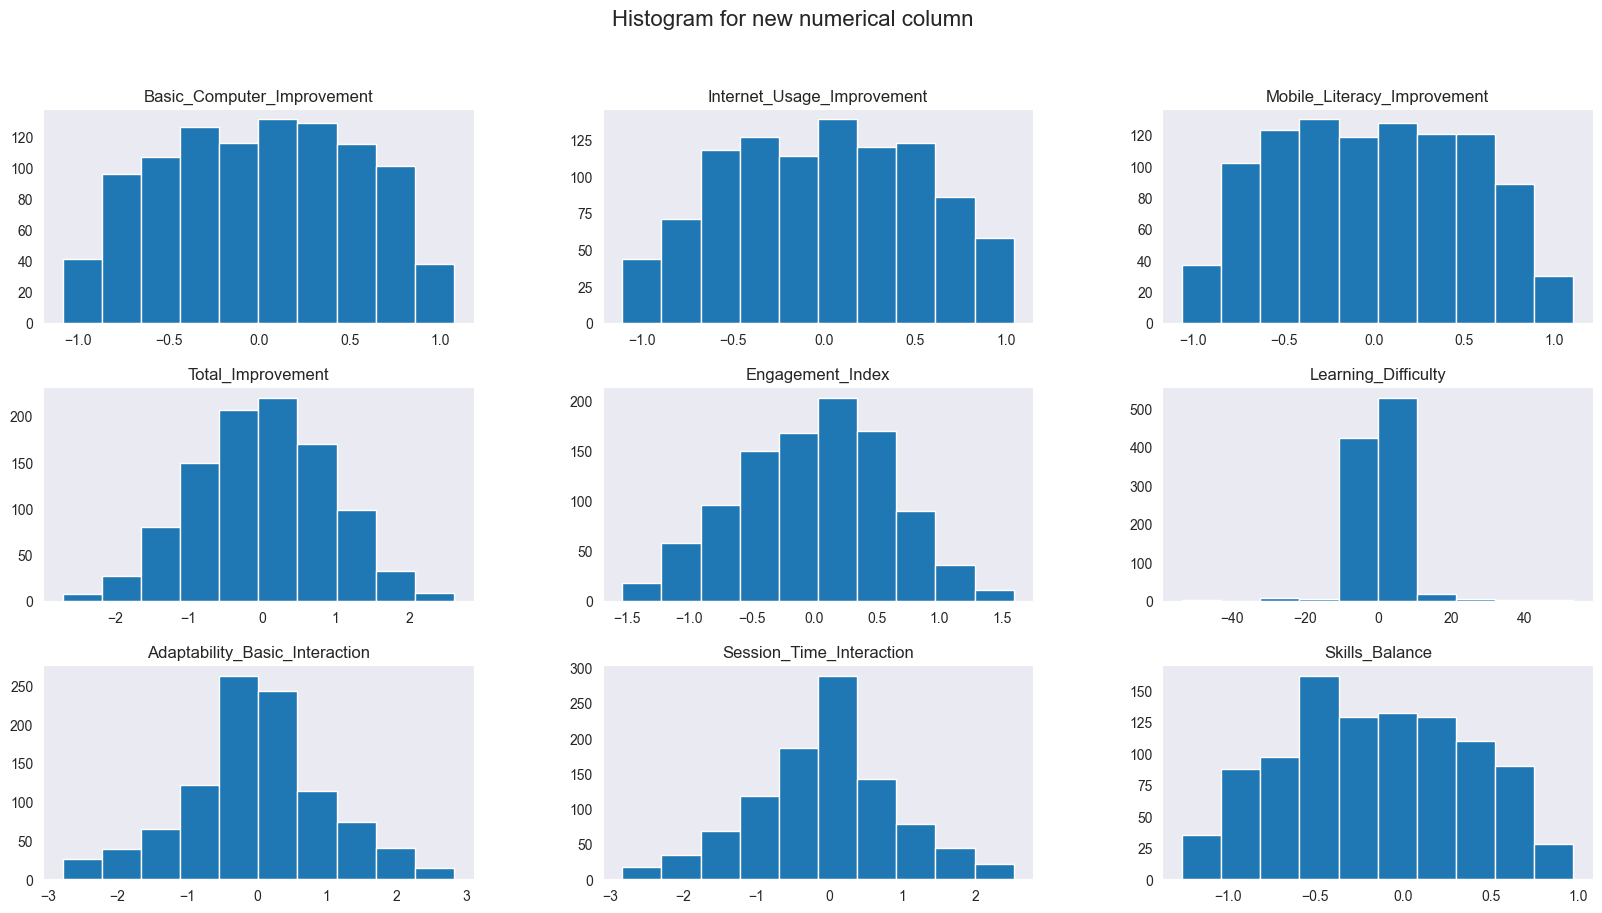

In [38]:
df[new_columns].select_dtypes(include='number').hist(figsize=(20, 10), grid=False)
plt.suptitle('Histogram for new numerical column', fontsize=16)
plt.show()

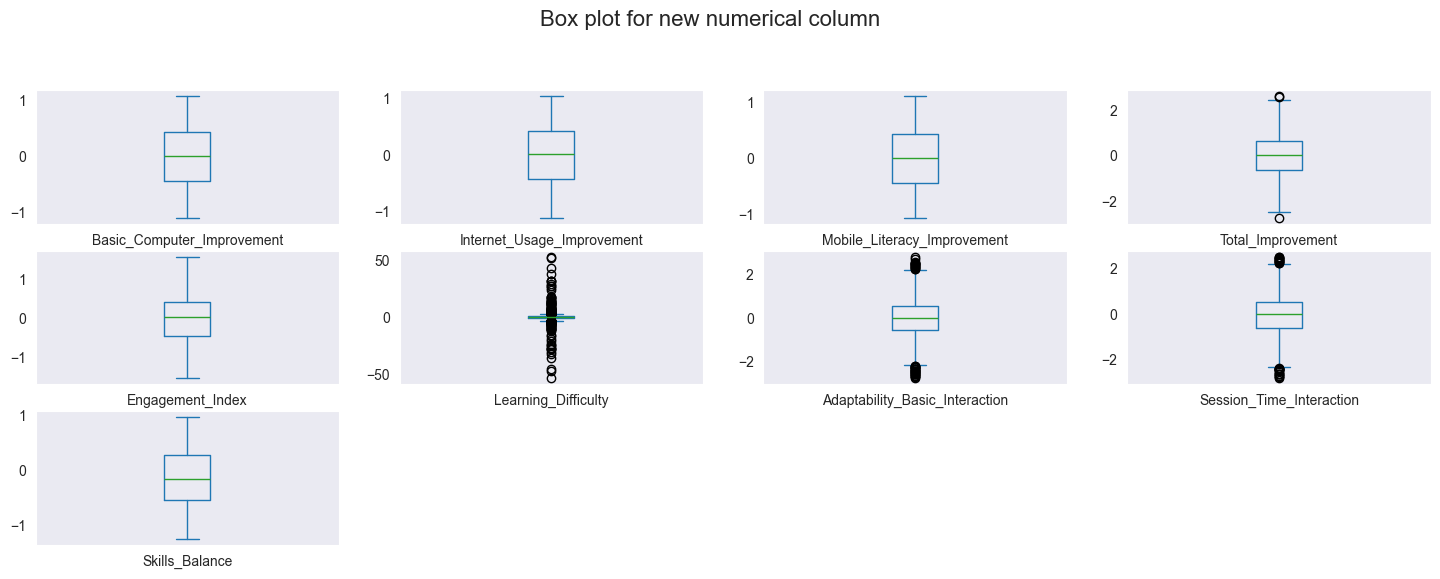

In [39]:
df[new_columns].select_dtypes(include='number').plot(kind='box', subplots=True, layout=(4, 4), figsize=(18, 8), grid=False)
plt.suptitle('Box plot for new numerical column', fontsize=16)
plt.show()

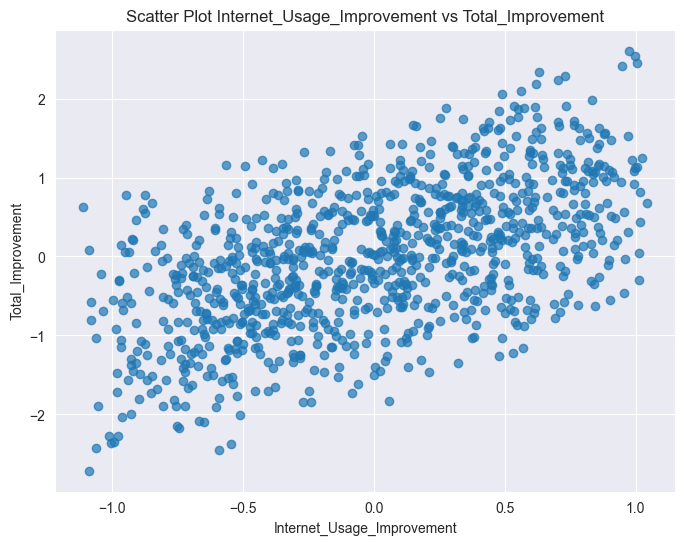

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Internet_Usage_Improvement'], df['Total_Improvement'], alpha=0.7)
plt.xlabel('Internet_Usage_Improvement')
plt.ylabel('Total_Improvement')
plt.title('Scatter Plot Internet_Usage_Improvement vs Total_Improvement')
plt.grid(True)
plt.show()


Покращення інтернет-навичок добре пов'язане із загальним покращенням навичок

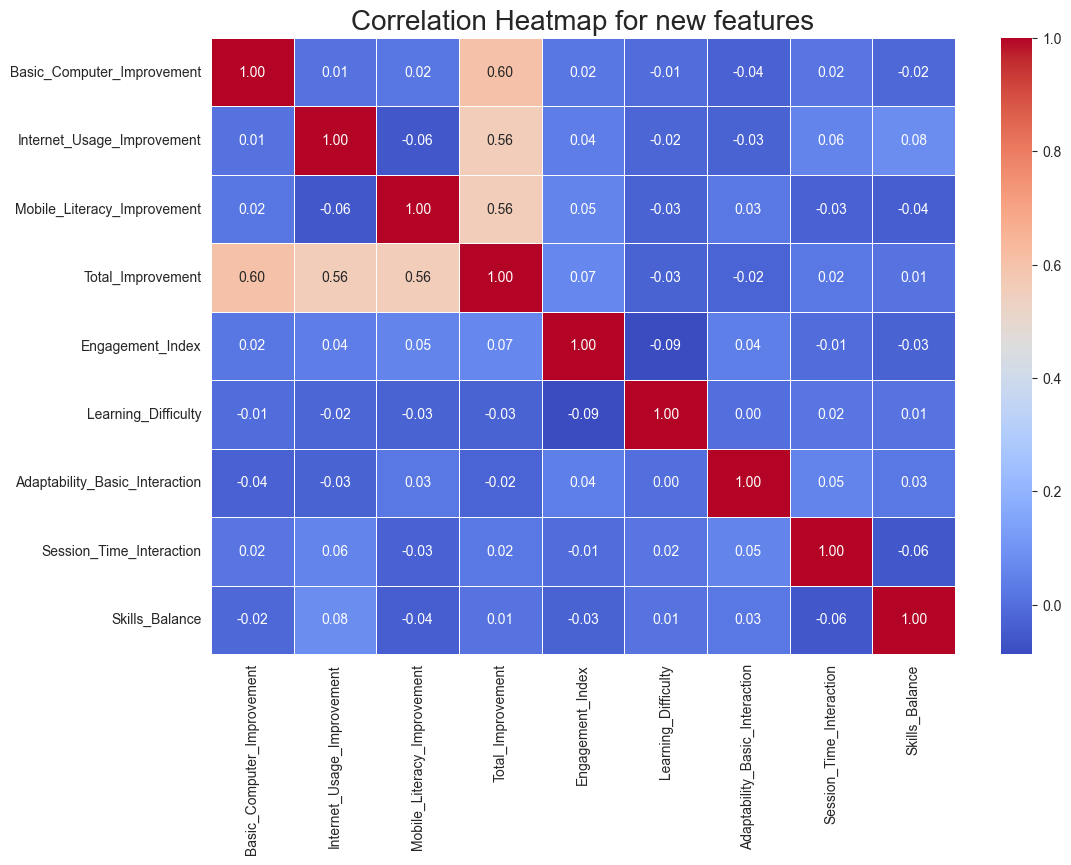

In [41]:
corr_matrix = df[new_columns].select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for new features', fontsize=20)
plt.show()

## Task 4: Data Visualization
**Objective:** Create insightful visualizations to communicate findings.

**Instructions:**
1. Use the dataset with new features from Task 3.
2. Create a bar chart to compare categorical features.
3. Use a line plot to show trends over time (if applicable).
4. Create a heatmap to visualize correlations between features.
5. Use Seaborn to create a violin plot or swarm plot to compare distributions across categories.
6. Combine multiple plots into a single figure using Matplotlib's subplot functionality.

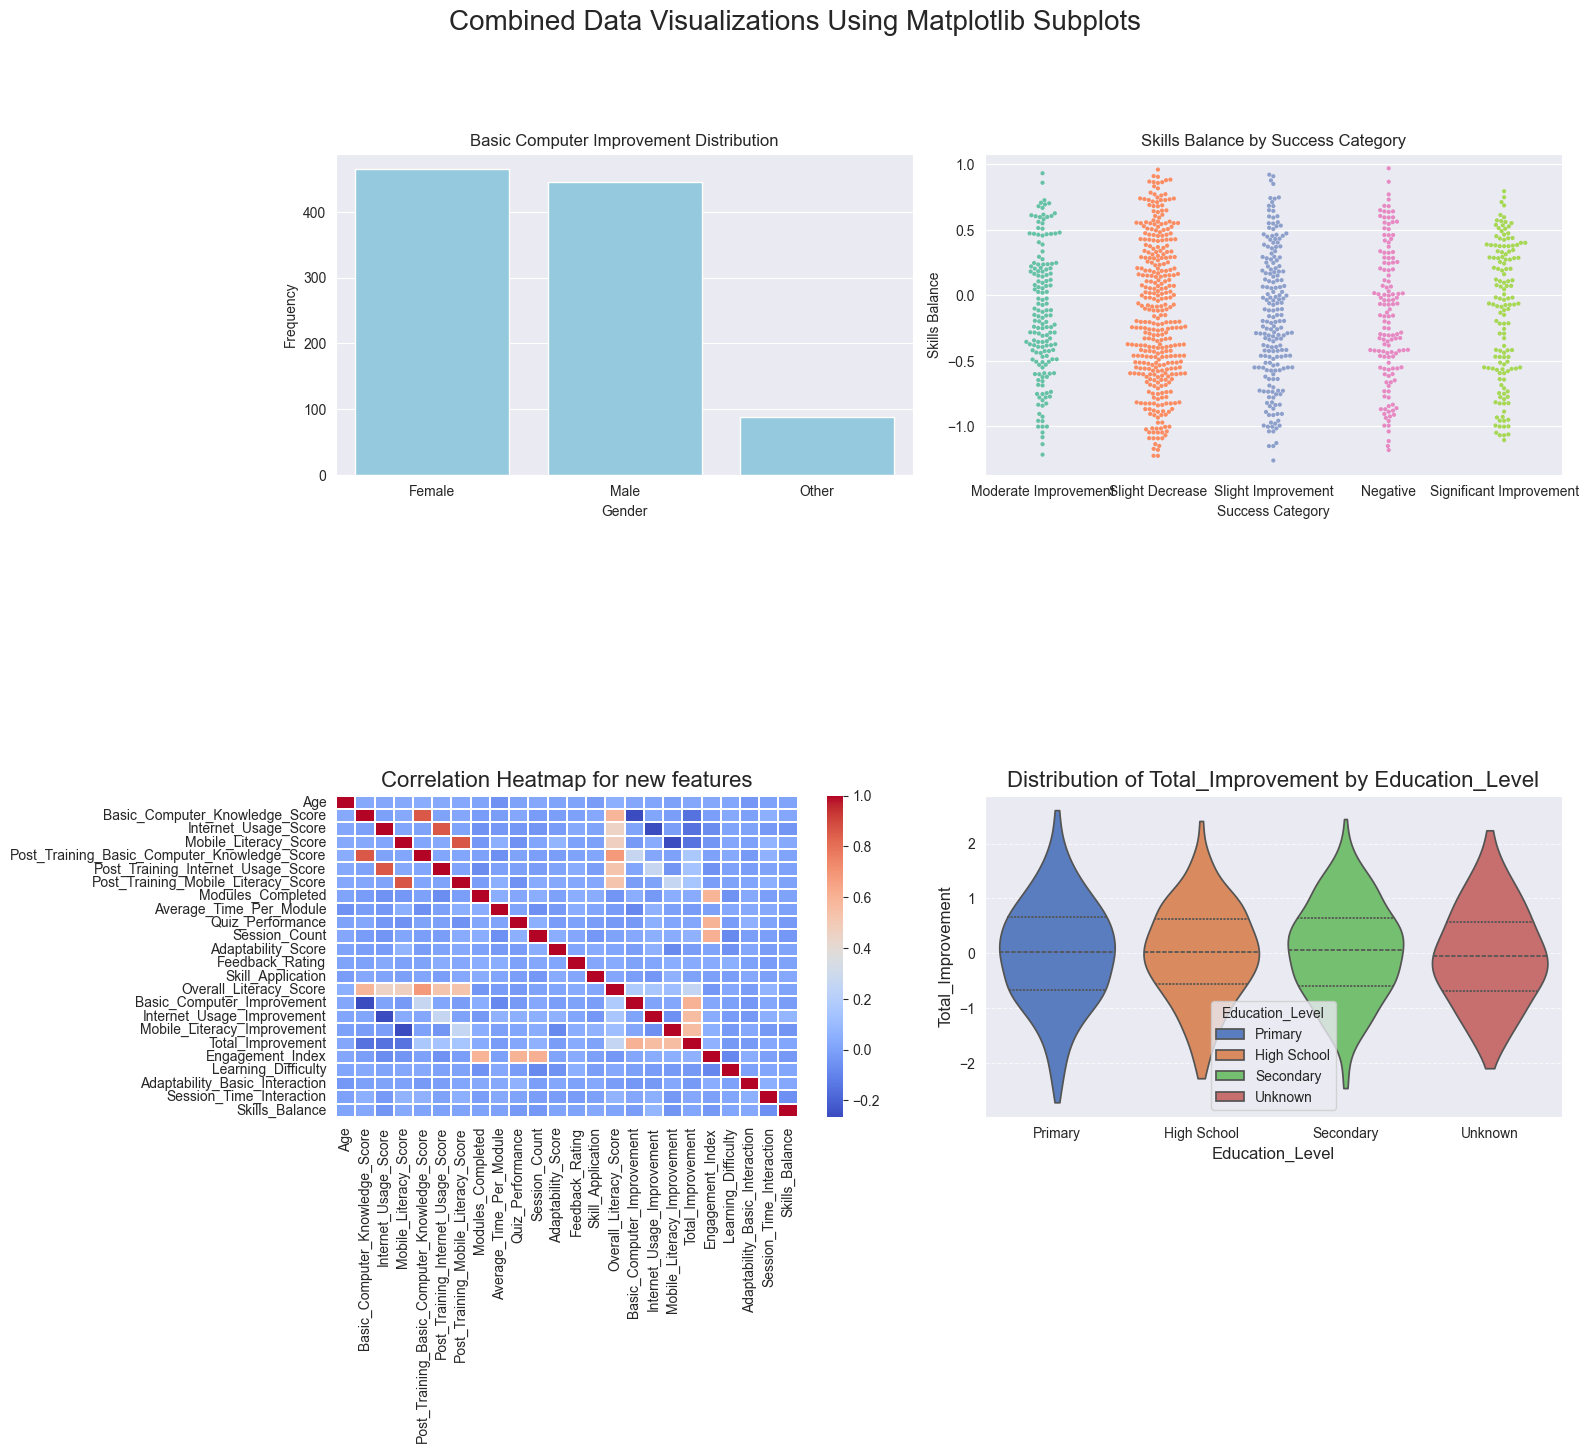

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

fig = plt.figure(figsize=(16, 18))
fig.suptitle('Combined Data Visualizations Using Matplotlib Subplots', fontsize=20)
gs = gridspec.GridSpec(nrows=3, ncols=2, figure=fig)
# barplot
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts().values, ax=ax1, color='skyblue')
ax1.set_title('Basic Computer Improvement Distribution')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
#swarm plot
ax2 = fig.add_subplot(gs[0, 1])
sns.swarmplot(data=df, x='Success_Category', y='Skills_Balance', hue = 'Success_Category', palette='Set2', ax=ax2, size = 3)
ax2.set_title('Skills Balance by Success Category')
ax2.set_xlabel('Success Category')
ax2.set_ylabel('Skills Balance')
#heatmap
ax3 = fig.add_subplot(gs[1, 0])
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.1, ax=ax3)
ax3.set_title('Correlation Heatmap for new features', fontsize=16)

# violin plot
ax4 = fig.add_subplot(gs[1, 1])
sns.violinplot(
    x="Education_Level",
    y="Total_Improvement",
    data=df,
    hue="Education_Level",
    palette="muted",
    legend=True,
    inner="quartile",
    cut=0,
    ax=ax4
)
ax4.set_title("Distribution of Total_Improvement by Education_Level", fontsize=16)
ax4.set_xlabel("Education_Level", fontsize=12)
ax4.set_ylabel("Total_Improvement", fontsize=12)
ax4.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()
